<a href="https://colab.research.google.com/github/timlongfield/Snapchat_Filters/blob/main/halo_overlay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import imageio
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Import the pre-trained models for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [2]:
!wget https://i.postimg.cc/XNCmwyM2/IMG-2959.jpg -O jax.png

--2021-12-20 20:20:04--  https://i.postimg.cc/XNCmwyM2/IMG-2959.jpg
Resolving i.postimg.cc (i.postimg.cc)... 104.238.220.13
Connecting to i.postimg.cc (i.postimg.cc)|104.238.220.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96512 (94K) [image/jpeg]
Saving to: ‘jax.png’

jax.png             100%[===================>]  94.25K  --.-KB/s    in 0.02s   

2021-12-20 20:20:04 (3.96 MB/s) - ‘jax.png’ saved [96512/96512]



In [3]:
#Code for overlay: https://towardsdatascience.com/how-to-make-your-own-instagram-filter-with-facial-recognition-from-scratch-using-python-d3a42029e65b

In [16]:
img = imageio.imread('jax.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [5]:
!wget https://i.postimg.cc/j25q14wM/halo.png -O halo.jpg

--2021-12-20 20:20:06--  https://i.postimg.cc/j25q14wM/halo.png
Resolving i.postimg.cc (i.postimg.cc)... 104.238.220.13
Connecting to i.postimg.cc (i.postimg.cc)|104.238.220.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4918 (4.8K) [image/png]
Saving to: ‘halo.jpg’

halo.jpg            100%[===================>]   4.80K  --.-KB/s    in 0s      

2021-12-20 20:20:06 (101 MB/s) - ‘halo.jpg’ saved [4918/4918]



In [6]:
# read overlay image
halo = cv2.imread('halo.jpg')
# cv2_imshow(halo)

#get shape of halo
#original_halo_h,original_halo_w,halo_channels = halo.shape
halo_h = halo.shape[0]
halo_w = halo.shape[1]
# Create overlay source matrix
src_mat = np.array([[0,0], [halo_w, 0],  [halo_w, halo_h], [0, halo_h]])

#read img
img = imageio.imread('jax.png')

#get shape of img
# img_h,img_w,img_channels = img.shape
img_h = img.shape[0]
img_w = img.shape[1]
# Create img source matrix
src_mat = np.array([[0,0], [img_w, 0],  [img_w, img_h], [0, img_h]])

#convert to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
halo_gray = cv2.cvtColor(halo, cv2.COLOR_BGR2GRAY)

#create mask and inverse mask of halo
ret, original_mask = cv2.threshold(halo_gray, 10, 255, cv2.THRESH_BINARY_INV)
original_mask_inv = cv2.bitwise_not(original_mask)

#find faces in image using classifier
faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)

-85
411
-320
205


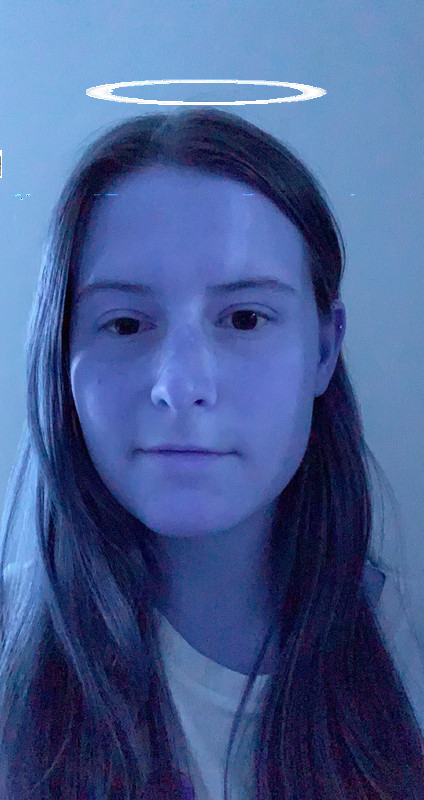

In [7]:
for (x,y,w,h) in faces:
    #retangle for testing purposes
    #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    #coordinates of face region
    face_x1 = x
    face_x2 = x + w
    face_y1 = y
    face_y2 = w + h

    #halo size in relation to face by scaling
    halo_width = int(1.5 * w)
    halo_height = int(halo_width * halo_h / halo_w)
    
    #setting location of coordinates of halo
    halo_x1 = face_x2 - int(w/2) - int(halo_width/2) - 30 
    halo_x2 = halo_x1 + halo_width
    halo_y1 = face_y1 - int(h*1.25) - 100
    halo_y2 = halo_y1 + halo_height

    print(halo_x1)   
    print(halo_x2)
    print(halo_y1)
    print(halo_y2)

    #check to see if out of frame
    if halo_x1 < 0:
        halo_x1 = 0
    if halo_y1 < 0:
        halo_y1 = 0
    if halo_x2 > img_w:
        halo_x2 = img_w
    if halo_y2 > img_h:
        halo_y2 = img_h

    #Account for any out of frame changes
    halo_width = halo_x2 - halo_x1
    halo_height = halo_y2 - halo_y1

    #resize halo to fit on face
    halo = cv2.resize(halo, (halo_width,halo_height), interpolation = cv2.INTER_AREA)
    mask = cv2.resize(original_mask, (halo_width,halo_height), interpolation = cv2.INTER_AREA)
    mask_inv = cv2.resize(original_mask_inv, (halo_width,halo_height), interpolation = cv2.INTER_AREA)

    #take ROI for halo from background that is equal to size of halo image
    roi = img[halo_y1:halo_y2, halo_x1:halo_x2]

    #original image in background (bg) where halo is not present
    roi_bg = cv2.bitwise_and(roi,roi,mask = mask)
    roi_fg = cv2.bitwise_and(halo,halo,mask=mask_inv)
    dst = cv2.add(roi_bg,roi_fg)

    #put back in original image
    img[halo_y1:halo_y2, halo_x1:halo_x2] = dst


cv2_imshow(img) #display image
cv2.waitKey(0) #wait until key is pressed to proceed
cv2.destroyAllWindows() #close all windows

In [9]:
#Code for video capture source: https://androidkt.com/how-to-capture-and-play-video-in-google-colab/
#and from: https://learnopencv.com/read-write-and-display-a-video-using-opencv-cpp-python/

In [10]:
from IPython.display import display, Javascript,HTML
from google.colab.output import eval_js
from base64 import b64decode

In [11]:
def record_video(filename):
  js=Javascript("""
    async function recordVideo() {
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");
      
      capture.textContent = "Start Recording";
      capture.style.background = "orange";
      capture.style.color = "white";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({audio:true, video: true});
    
      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);

      video.srcObject = stream;
      video.muted = true;

      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);

      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();
      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();
      
      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
    return btoa(binaryString);
    }
  """)
  try:
    display(js)
    data=eval_js('recordVideo({})')
    binary=b64decode(data)
    with open(filename,"wb") as video_file:
      video_file.write(binary)
    print(f"Finished recording video at:{filename}")
  except Exception as err:
    print(str(err))

In [12]:
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 600):
  
  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

In [16]:
video_path = "test.mp4"
record_video(video_path)

In [16]:
show_video(video_path)

In [16]:
#read video
video = cv2.VideoCapture('test.mp4')
ret, img = video.read()
img_h, img_w = img.shape[:2]

while True: #continue to run until user breaks loop
    
    #read each frame of video and convert to gray
    ret, img = video.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #^^ There is an issue here that prevents an actual video from outputting
    #It seems that the while loop runs one too many and is trying to grayscale a 
    #non existent fr

    #find faces in image using classifier
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    #do the same thing as if a picture for each frame
    #for every face found:
    for (x,y,w,h) in faces:
        #retangle for testing purposes
        #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

        #coordinates of face region
        face_x1 = x
        face_x2 = x + w
        face_y1 = y
        face_y2 = w + h

        #halo size in relation to face by scaling
        halo_width = int(1.5 * w)
        halo_height = int(halo_width * halo_h / halo_w)
        
        #setting location of coordinates of halo
        halo_x1 = face_x2 - int(w/2) - int(halo_width/2) - 30 
        halo_x2 = halo_x1 + halo_width
        halo_y1 = face_y1 - int(h*1.25) - 100
        halo_y2 = halo_y1 + halo_height

        #check to see if out of frame
        if halo_x1 < 0:
            halo_x1 = 0
        if halo_y1 < 0:
            halo_y1 = 0
        if halo_x2 > img_w:
            halo_x2 = img_w
        if halo_y2 > img_h:
            halo_y2 = img_h

        #Account for any out of frame changes
        halo_width = halo_x2 - halo_x1
        halo_height = halo_y2 - halo_y1

        #resize halo to fit on face
        halo = cv2.resize(halo, (halo_width,halo_height), interpolation = cv2.INTER_AREA)
        mask = cv2.resize(original_mask, (halo_width,halo_height), interpolation = cv2.INTER_AREA)
        mask_inv = cv2.resize(original_mask_inv, (halo_width,halo_height), interpolation = cv2.INTER_AREA)

        #take ROI for halo from background that is equal to size of halo image
        roi = img[halo_y1:halo_y2, halo_x1:halo_x2]

        #original image in background (bg) where halo is not
        roi_bg = cv2.bitwise_and(roi,roi,mask = mask)
        roi_fg = cv2.bitwise_and(halo,halo,mask=mask_inv)
        dst = cv2.add(roi_bg,roi_fg)

        #put back in original image
        img[halo_y1:halo_y2, halo_x1:halo_x2] = dst

        break
        
    #display image
    cv2_imshow(img) 
    show_video('test.mp4')

    #if user pressed 'q' break
    if cv2.waitKey(1) == ord('q'): # 
        break;

video.release() #turn off camera 
cv2.destroyAllWindows() #close all windows